<a href="https://colab.research.google.com/github/zamzamfr/UAS-AI/blob/main/klasifikasi_obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Klasifikasi Obesitas menggunakan KNN
Dibuat oleh : zamzam fr

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Upload file to Colab (required if running interactively)
from google.colab import files
uploaded = files.upload()

Saving Obesity Classification.csv to Obesity Classification.csv


In [3]:
# Load the dataset
data_path = list(uploaded.keys())[0]  # Automatically use the uploaded file
df = pd.read_csv(data_path)

In [4]:
# Data Loading and Overview
print("Dataset Overview:")
print(df.head().T)  # Transpose for horizontal view

Dataset Overview:
                    0              1           2            3      4
ID                  1              2           3            4      5
Age                25             30          35           40     45
Gender           Male         Female        Male       Female   Male
Height            175            160         180          150    190
Weight             80             60          90           50    100
BMI              25.3           22.5        27.3         20.0   31.2
Label   Normal Weight  Normal Weight  Overweight  Underweight  Obese


In [5]:
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [6]:
print("\nStatistical Summary:")
print(df.describe().T)  # Transpose for horizontal view


Statistical Summary:
        count        mean        std    min     25%    50%     75%    max
ID      108.0   56.046296  31.917939    1.0   28.75   56.5   83.25  110.0
Age     108.0   46.555556  24.720620   11.0   27.00   42.5   59.25  112.0
Height  108.0  166.574074  27.873615  120.0  140.00  175.0  190.00  210.0
Weight  108.0   59.490741  28.856233   10.0   35.00   55.0   85.00  120.0
BMI     108.0   20.549074   7.583818    3.9   16.70   21.2   26.10   37.2


In [7]:
# Check for duplicates and missing values
print("\nChecking for duplicates:")
print(df.duplicated().sum(), "duplicates found")



Checking for duplicates:
0 duplicates found


In [8]:
print("\nMissing Values:")
print(df.isnull().sum().T)  # Transpose for horizontal view


Missing Values:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [9]:
# Handle duplicates (if any)
if df.duplicated().sum() > 0:
    df = df.drop_duplicates()
    print("\nDuplicates removed. Remaining rows:", len(df))

In [10]:
# Handle missing values
print("\nHandling missing values:")
missing_cols = df.columns[df.isnull().any()]
for col in missing_cols:
    print(f"Column {col} has {df[col].isnull().sum()} missing values. Applying amputation.")
    df = df[~df[col].isnull()]  # Remove rows with missing values in this column


Handling missing values:


In [11]:
print("Missing values after handling:")
print(df.isnull().sum().T)  # Transpose for horizontal view

Missing values after handling:
ID        0
Age       0
Gender    0
Height    0
Weight    0
BMI       0
Label     0
dtype: int64


In [12]:
# Assuming the target column is named 'Target'
if 'Target' in df.columns:
    target = 'Target'
else:
    target = df.columns[-1]  # Use the last column as target by default

features = [col for col in df.columns if col != target]
print("\nTarget column:", target)
print("Feature columns:", features)


Target column: Label
Feature columns: ['ID', 'Age', 'Gender', 'Height', 'Weight', 'BMI']



Target Analysis:
Label
Underweight      47
Normal Weight    29
Overweight       20
Obese            12
Name: count, dtype: int64


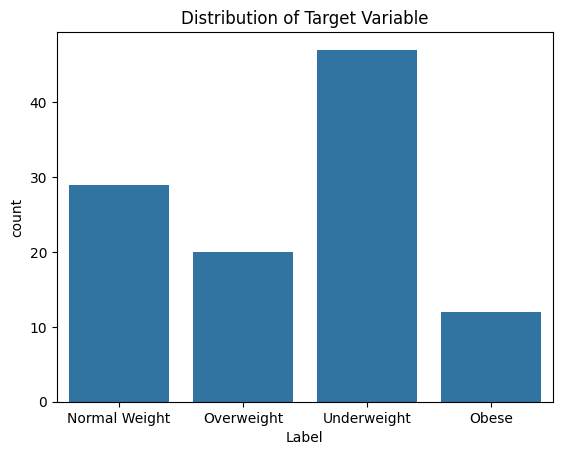

In [13]:
# Analyze the target variable
print("\nTarget Analysis:")
print(df[target].value_counts().T)  # Transpose for horizontal view
sns.countplot(x=target, data=df)
plt.title("Distribution of Target Variable")
plt.show()

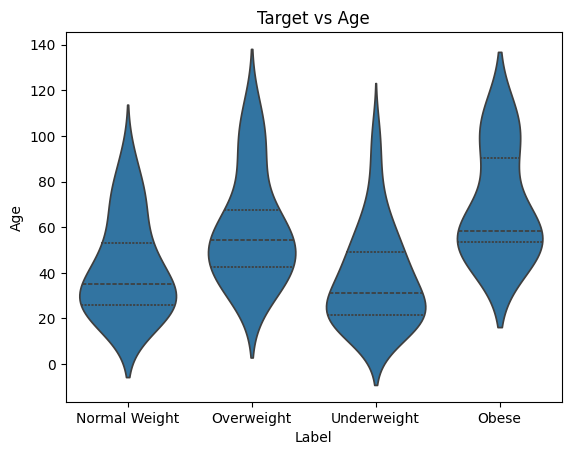

In [16]:
# Target vs Numeric (Age)
if 'Age' in df.columns:
    sns.violinplot(x=target, y='Age', data=df, inner="quartile")
    plt.title("Target vs Age")
    plt.show()

In [17]:
# Target vs Numeric (Fare)
if 'Fare' in df.columns:
    sns.violinplot(x=target, y='Fare', data=df, inner="quartile")
    plt.title("Target vs Fare")
    plt.show()



Target vs Gender:


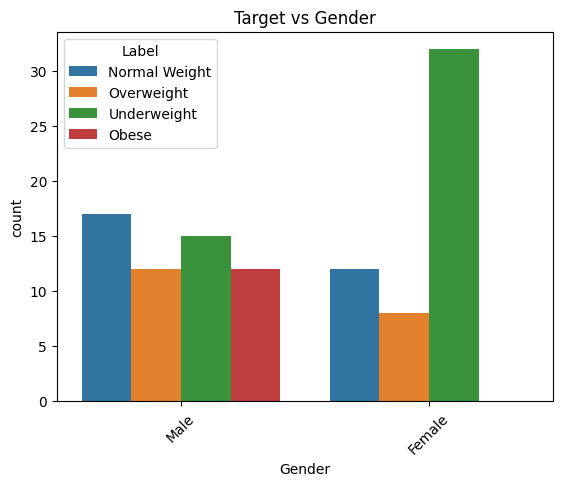

In [19]:
# Target vs Gender (if Gender column exists)
if 'Gender' in df.columns:
    print("\nTarget vs Gender:")
    sns.countplot(x='Gender', hue=target, data=df)
    plt.title("Target vs Gender")
    plt.xticks(rotation=45)
    plt.show()

In [20]:
# Target vs Categorical/Ordinal
categorical_features = [col for col in features if df[col].dtype == 'object' and col != 'Gender']
ordinal_features = [col for col in features if df[col].dtype != 'object' and col not in ['Age', 'Fare']]

In [21]:
for cat in categorical_features:
    print(f"\nTarget vs {cat}:")
    sns.countplot(x=cat, hue=target, data=df)
    plt.title(f"Target vs {cat}")
    plt.xticks(rotation=45)
    plt.show()


Target vs ID:


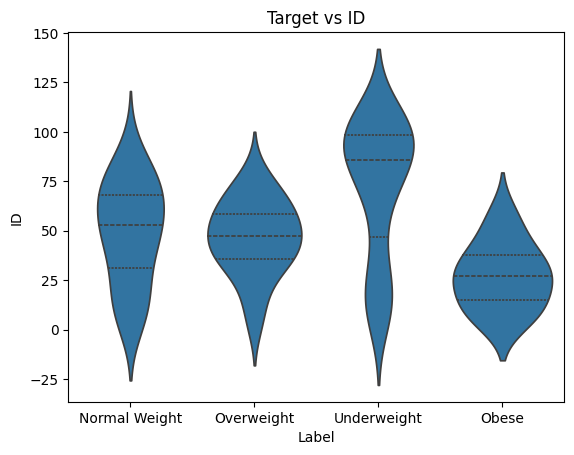


Target vs Height:


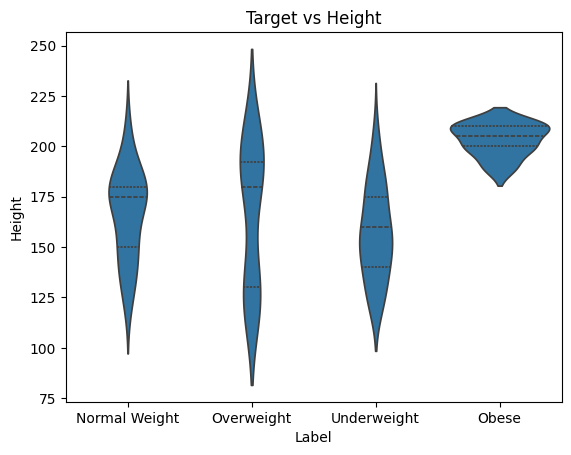


Target vs Weight:


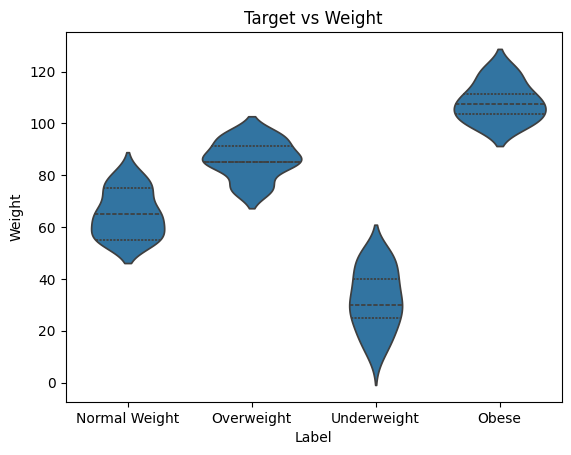


Target vs BMI:


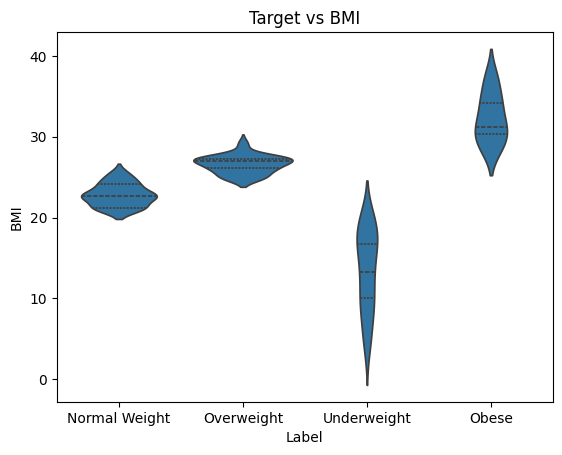

In [23]:
for ord_col in ordinal_features:
    print(f"\nTarget vs {ord_col}:")
    sns.violinplot(x=target, y=ord_col, data=df, inner="quartile")
    plt.title(f"Target vs {ord_col}")
    plt.show()